# Introduction
Transportation efficiency is a critical factor in urban planning and sustainability. This document initiates the process of analyzing public transportation efficiency using IBM Cognos for visualization. Beginning with an exploration of the concept of transportation efficiency, we aim to collect, process, and clean relevant data to facilitate in-depth analysis. This analysis will provide valuable insights for improving public transportation system.
# Analysis Objectives
The primary objectives of this project are to assess and improve public transportation efficiency. This involves evaluating factors such as ridership trends, route optimization, on-time performance, and environmental impact. We seek to leverage IBM Cognos for data visualization to gain actionable insights, enhance decision-making for transportation authorities, and contribute to more sustainable and effective urban mobility systems.

At present we tried visualisations that show how NumberOfBoardings is distributed across routes, stops and a week.

# Data Cleaning and Preprocessing

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unisys/Public Transport Boarding Summary by Route, Trip, Stop and Week of Year.doc
/kaggle/input/unisys/20140711.CSV
/kaggle/input/unisys/ptsboardingsummary/Public Transport Boarding Summary by Route, Trip, Stop and Week of Year.doc
/kaggle/input/unisys/ptsboardingsummary/20140711.CSV


The data fields in the given file are
* **TripID** Unique identity of trip
* **RouteID** Value representing public transport route
* **StopID** Unique identity of stop
* **StopName** Name of given stop
* **WeekBeginning** Date representing first day of any week
* **NumberOfBoarding** Count of all boarding’s occurred at this stop for the named trip over the previous week

In [2]:
# Step 1: Load the dataset
print("Load the dataset")
import pandas as pd
data = pd.read_csv('/kaggle/input/unisys/20140711.CSV', low_memory=False)
data.shape
data.head(10)

Load the dataset


,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,2013-06-30 00:00:00,1
1,23631,100,14144,177 Cross Rd,2013-06-30 00:00:00,1
2,23632,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30 00:00:00,2
4,23633,100,14147,178 Cross Rd,2013-06-30 00:00:00,1
5,23634,100,13907,9A Marion Rd,2013-06-30 00:00:00,1
6,23634,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
7,23634,100,13335,9A Holbrooks Rd,2013-06-30 00:00:00,1
8,23634,100,13875,9 Marion Rd,2013-06-30 00:00:00,1
9,23634,100,13045,206 Holbrooks Rd,2013-06-30 00:00:00,1


In [7]:
# Step 2:  Drop duplicates and Check data types of columns
data = data.drop_duplicates()
import seaborn as sns
print(data.dtypes)

TripID                 int64
RouteID              float64
StopID                 int64
StopName              object
WeekBeginning         object
NumberOfBoardings      int64
dtype: object


In [3]:
# Step 2: Check data types of columns
print("\nCheck data types of columns")
print(data.dtypes)


Check data types of columns
TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object


In [5]:
# Step 3: Handle mixed data types
#'RouteID' column has mixed types, convert it to numeric
data['RouteID'] = pd.to_numeric(data['RouteID'], errors='coerce')
print("Handle mixed data types")
print(data.shape)

Handle mixed data types
(10857234, 6)


In [6]:
# Step 4: Handle missing values
# Drop rows with missing values or fill them based on your project requirements
data = data.dropna()
print("\nHandle missing values")
print(data.shape)


Handle missing values
(6414906, 6)


In [8]:
# Step 5: Convert 'WeekBeginning' column to datetime format
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'], errors='coerce')
print("\nConvert 'WeekBeginning' column to datetime format")
print(data['WeekBeginning'].head())


Convert 'WeekBeginning' column to datetime format
0   2013-06-30
1   2013-06-30
2   2013-06-30
3   2013-06-30
4   2013-06-30
Name: WeekBeginning, dtype: datetime64[ns]


In [6]:
# Step 6: Clean 'StopName' column
# Remove leading and trailing whitespaces
data['StopName'] = data['StopName'].str.strip()
print("\nClean 'StopName' column")
print(data['StopName'].head())


Clean 'StopName' column
0                  181 Cross Rd
1                  177 Cross Rd
2                  175 Cross Rd
3    Zone A Arndale Interchange
4                  178 Cross Rd
Name: StopName, dtype: object


In [ ]:
data.head()

In [10]:
#Step 8 : Unique values for each column in the DataFrame
print(data.nunique())

TripID               23926
RouteID                323
StopID                6718
StopName              3840
WeekBeginning           54
NumberOfBoardings      381
dtype: int64


In [10]:
data.shape
data.columns
data.head(3)

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1
2,23632,100.0,14132,175 Cross Rd,2013-06-30,1


In [9]:
#Count the number of missing value in each coloumn
data.isnull().sum()

TripID               0
RouteID              0
StopID               0
StopName             0
WeekBeginning        0
NumberOfBoardings    0
dtype: int64

In [11]:
#different type of Unique Data in the dataset
data['WeekBeginning'].unique()

<DatetimeArray>
['2013-06-30 00:00:00', '2013-07-07 00:00:00', '2013-07-14 00:00:00',
 '2013-07-21 00:00:00', '2013-07-28 00:00:00', '2013-08-04 00:00:00',
 '2013-08-11 00:00:00', '2013-08-18 00:00:00', '2013-08-25 00:00:00',
 '2013-09-01 00:00:00', '2013-09-08 00:00:00', '2013-09-15 00:00:00',
 '2013-09-22 00:00:00', '2013-09-29 00:00:00', '2013-10-06 00:00:00',
 '2013-10-13 00:00:00', '2013-10-20 00:00:00', '2013-10-27 00:00:00',
 '2013-11-03 00:00:00', '2013-11-10 00:00:00', '2013-11-17 00:00:00',
 '2013-11-24 00:00:00', '2013-12-01 00:00:00', '2013-12-08 00:00:00',
 '2013-12-15 00:00:00', '2013-12-22 00:00:00', '2013-12-29 00:00:00',
 '2014-01-05 00:00:00', '2014-01-12 00:00:00', '2014-01-19 00:00:00',
 '2014-01-26 00:00:00', '2014-02-02 00:00:00', '2014-02-09 00:00:00',
 '2014-02-16 00:00:00', '2014-02-23 00:00:00', '2014-03-02 00:00:00',
 '2014-03-09 00:00:00', '2014-03-16 00:00:00', '2014-03-23 00:00:00',
 '2014-03-30 00:00:00', '2014-04-06 00:00:00', '2014-04-13 00:00:00',
 '20

<Axes: xlabel='TripID'>

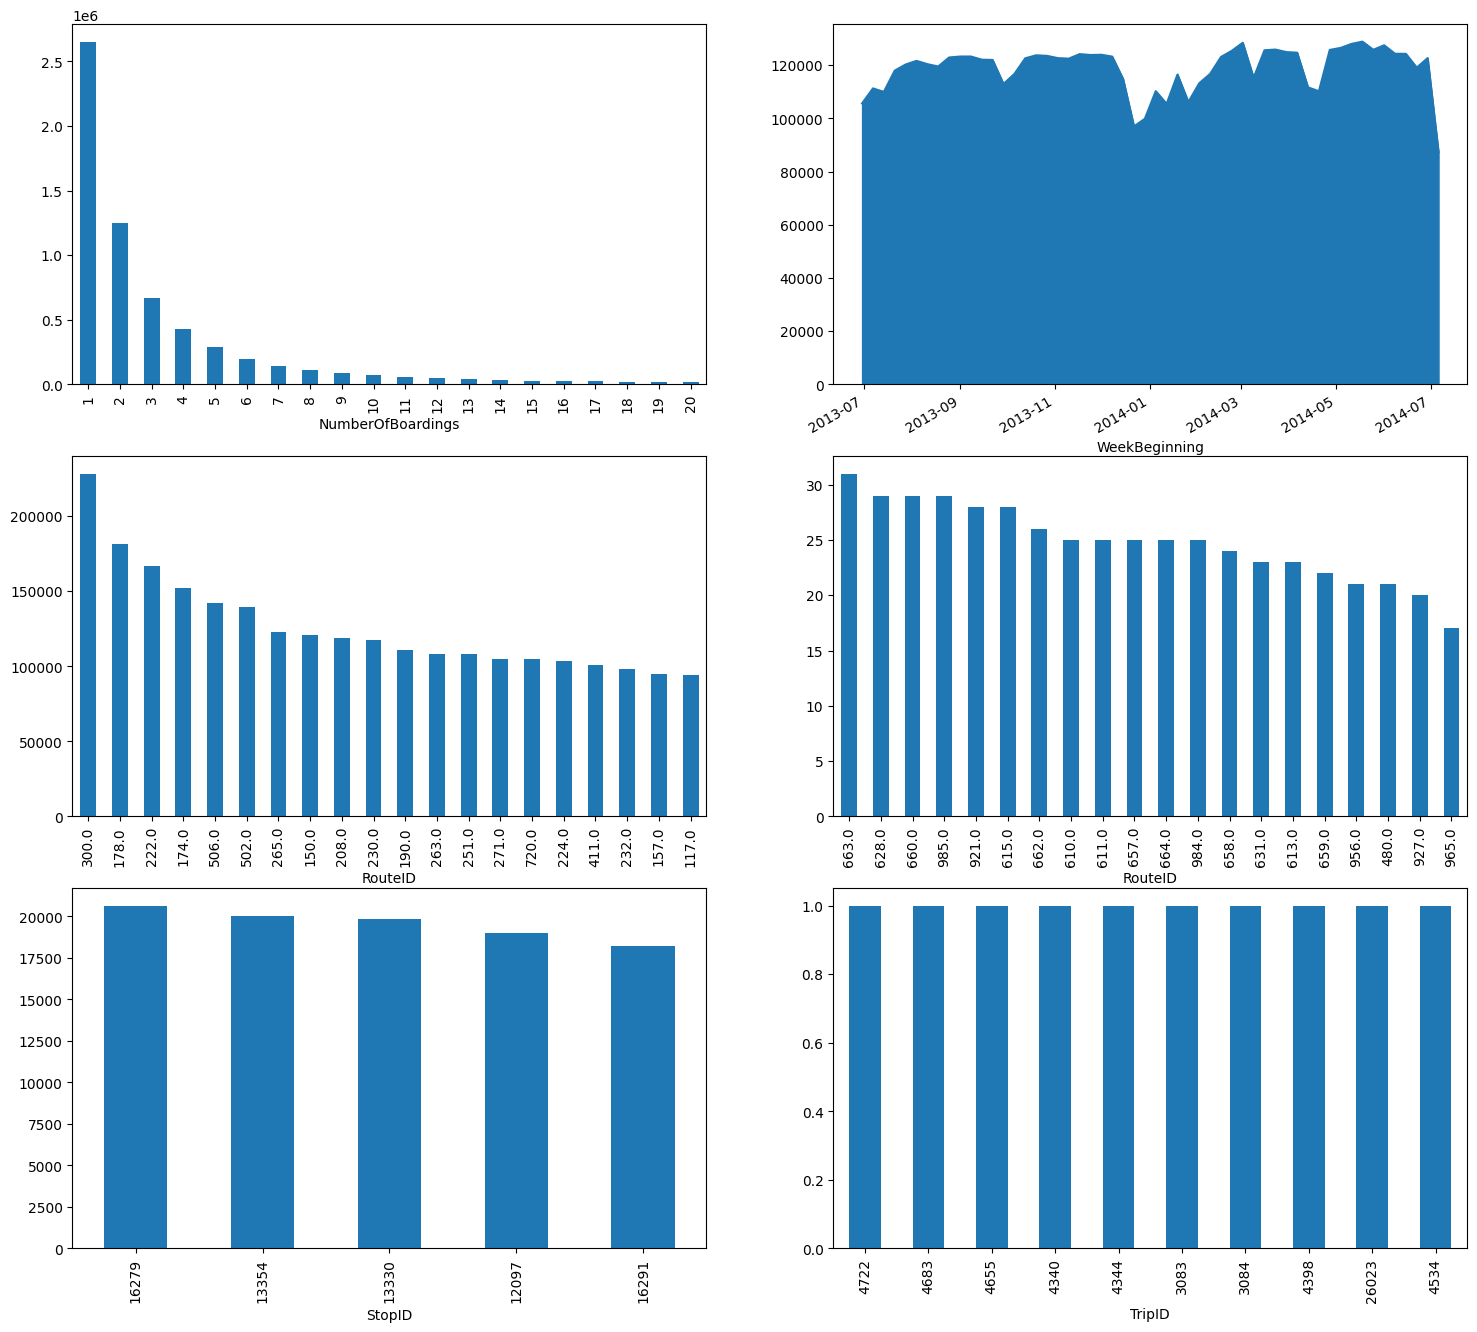

In [12]:
import matplotlib.pyplot as plt
fig,axrr=plt.subplots(3,2,figsize=(18,18))
data['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])
data['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])
data['RouteID'].value_counts().head(20).plot.bar(ax=axrr[1][0])
data['RouteID'].value_counts().tail(20).plot.bar(ax=axrr[1][1])
data['StopID'].value_counts().head(5).plot.bar(ax=axrr[2][0])
data['TripID'].value_counts().tail(10).plot.bar(ax=axrr[2][1])

In [13]:
# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_data.csv', index=False)
print("\nSave the cleaned dataset to a new CSV file")
print("Cleaned dataset saved successfully.")


Save the cleaned dataset to a new CSV file
Cleaned dataset saved successfully.


# Visualisation in IBM Cognos
A bar chart visualizing the **noOfBoardings** for each route for **RouteID** ranging from **100 to 288**

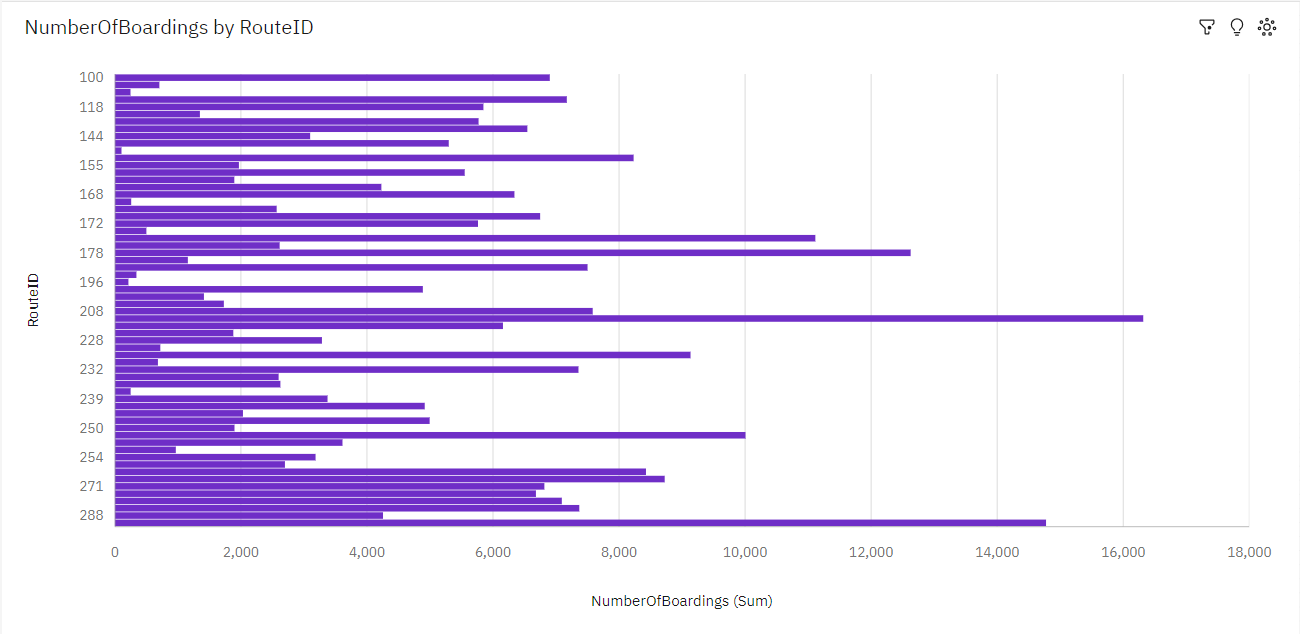

**Insights**:

**RouteID 222.0** has the **highest total NumberOfBoardings** due to WeekBeginning 2013-07-21.
**NumberOfBoardings** is unusually high when **RouteID is 222 and 300**.

****
Visualizing **NoOfBoardings** by **StopName**

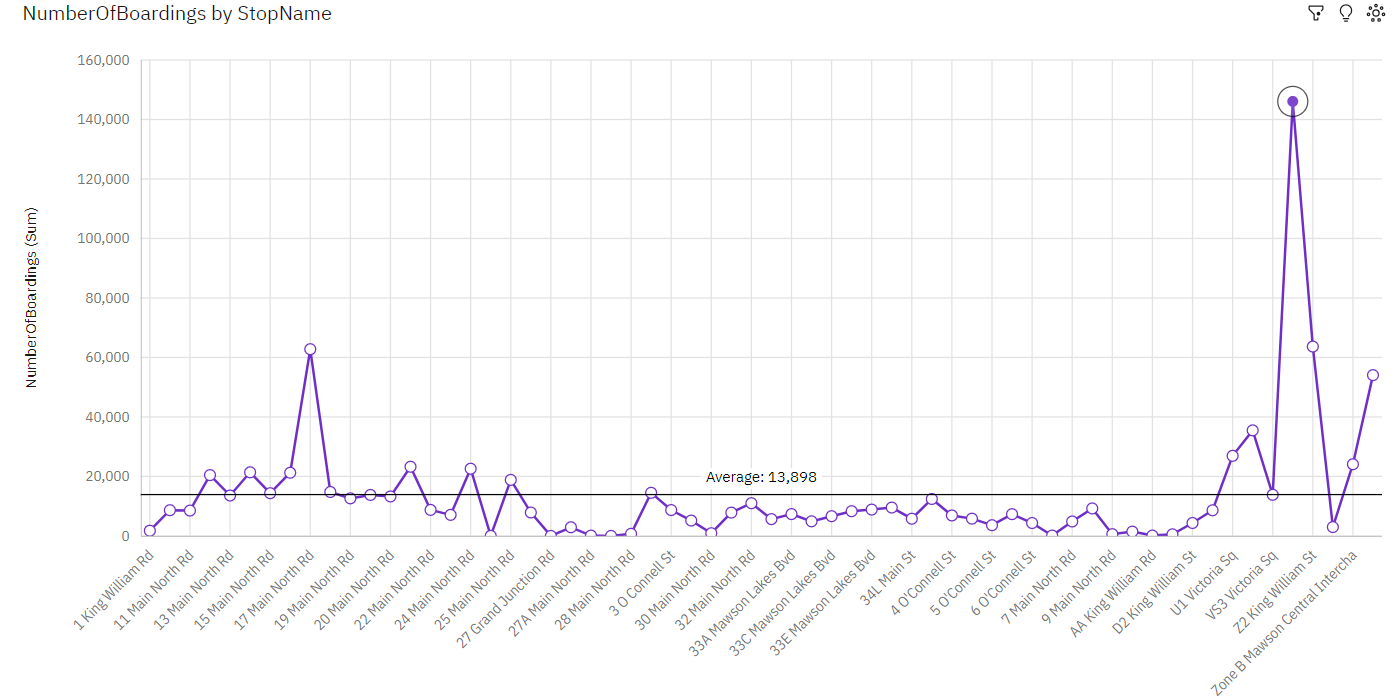

**Insight:**
**NumberOfBoardings** is unusually high when **StopName** is **X1 King William St.**

****
A heat map representing **NoOfBoardings** by **TripID** for the **WeekBeginning from 7/7/2013 to 8/25/2013**

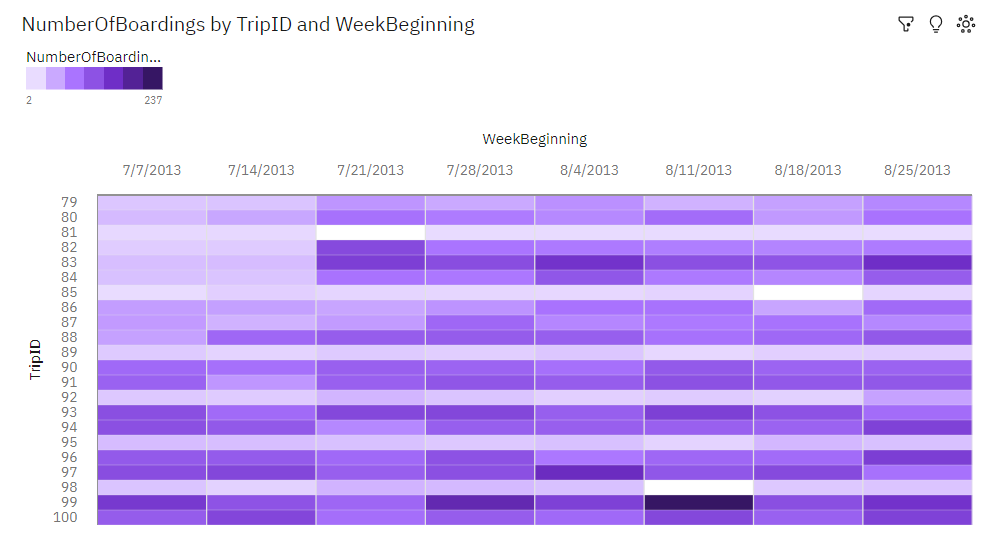


# Conclusion
In this initial phase of the project, the dataset was effectively processed and cleaned to ensure its accuracy and reliability. Subsequently, compelling visualizations were generated using IBM Cognos, setting the stage for a comprehensive analysis of public transportation efficiency. These preparatory steps are essential for facilitating informed decision-making and shaping the future of urban transportation systems.

**TEAM MEMBERS**
* Tejasree M S - 2021506113
* Sreenithi B - 2021506105
* Subithra C - 2021506109
* Yasvinippriyaa S K - 2021506126
* Vaishnavi V - 2021506116